In [10]:
import matplotlib.pyplot as plt
from matplotlib import colors
import six

import numpy as np
import xarray as xr
import pandas as pd
import os

from stompy import utils
from stompy.grid import unstructured_grid, multi_ugrid
import stompy.model.data_comparison as dc

import stompy.model.delft.dflow_model as dfm
import pesca_base

In [2]:
%matplotlib notebook

In [5]:
run_dirs=['data_highflow_v019']

<IPython.core.display.Javascript object>


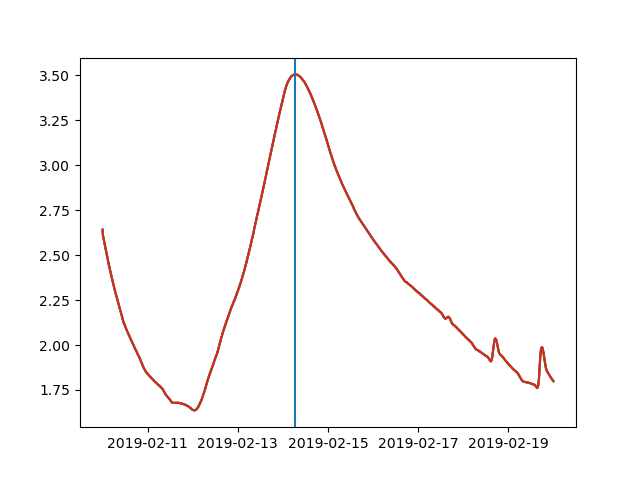

In [8]:
plt.figure()
for rd in run_dirs:
    his_ds=xr.open_dataset(os.path.join(rd,'DFM_OUTPUT_flowfm','flowfm_0000_his.nc'))
    his_ds['stations']=('stations',),his_ds.station_name.values
    
    plt.plot(his_ds.time,his_ds.waterlevel.sel(stations=b'nck'))
    
t_peak=np.datetime64('2019-02-14 06:30')
plt.axvline(t_peak)

In [11]:
mu=multi_ugrid.MultiUgrid(os.path.join(run_dirs[0],'DFM_OUTPUT_flowfm','flowfm_*_map.nc'))

INFO:UnstructuredGrid:Regenerating edges
INFO:UnstructuredGrid:Removing orphaned nodes
INFO:UnstructuredGrid:0 nodes found to be orphans
INFO:UnstructuredGrid:Removing duplicate nodes
INFO:UnstructuredGrid:Renumbering nodes
INFO:UnstructuredGrid:Renumbering edges
INFO:UnstructuredGrid:Extracting grid boundary
INFO:UnstructuredGrid:Regenerating edges
INFO:UnstructuredGrid:Removing orphaned nodes
INFO:UnstructuredGrid:0 nodes found to be orphans
INFO:UnstructuredGrid:Removing duplicate nodes
INFO:UnstructuredGrid:Renumbering nodes
INFO:UnstructuredGrid:Renumbering edges
INFO:UnstructuredGrid:Extracting grid boundary
INFO:UnstructuredGrid:Regenerating edges
INFO:UnstructuredGrid:Removing orphaned nodes
INFO:UnstructuredGrid:0 nodes found to be orphans
INFO:UnstructuredGrid:Removing duplicate nodes
INFO:UnstructuredGrid:Renumbering nodes
INFO:UnstructuredGrid:Renumbering edges
INFO:UnstructuredGrid:Extracting grid boundary
INFO:UnstructuredGrid:Regenerating edges
INFO:UnstructuredGrid:Remo

In [12]:
snap=mu.sel(time=t_peak,method='nearest')

<IPython.core.display.Javascript object>


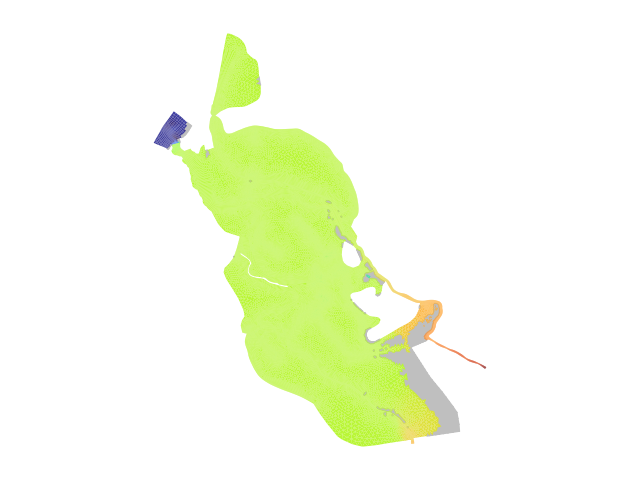

In [16]:
fig=plt.figure()
wet=snap.mesh2d_waterdepth.values>0.01
mu.grid.plot_cells(color='0.75',mask=~wet)
mu.grid.plot_cells(values=snap.mesh2d_s1,mask=wet,cmap='turbo')
plt.axis('equal')
plt.axis('off')
fig.tight_layout()